# Part 1: A little visualization exercise

### Downloading (using urllib) and Reading data
#### Libraries

In [1]:
from urllib.request import urlopen
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

# Part 2: Working with the dataset

The exercises continue to focus on the data in the big CSV file (see Week 1). 

Let's start by think a bit more about the crime-data file from San Francisco. 

In [9]:
#Picking the filename to import into a pandas dataframe
fileName = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

filePath = os.path.abspath(os.path.join(os.getcwd(), '..' ,'Datasets', fileName))
PDreports = pd.read_csv(filePath)

In [10]:
PDreports

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160948,16054122161030,160541221,61030,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Monday,07/04/2016,16:08,TENDERLOIN,NONE,...,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0
2160949,17044968764085,170449687,64085,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Thursday,06/01/2017,18:42,BAYVIEW,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
2160950,17047243406133,170472434,6133,LARCENY/THEFT,GRAND THEFT PURSESNATCH,Friday,06/09/2017,19:10,NORTHERN,NONE,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,22.0
2160951,17095059363010,170950593,63010,WARRANTS,WARRANT ARREST,Wednesday,11/22/2017,14:30,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0


We will look again only look at the focus-crimes.

In [11]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Exercise: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. Again, restrict yourself to the dataset of entire years 2013-2018

#### Weekly patterns

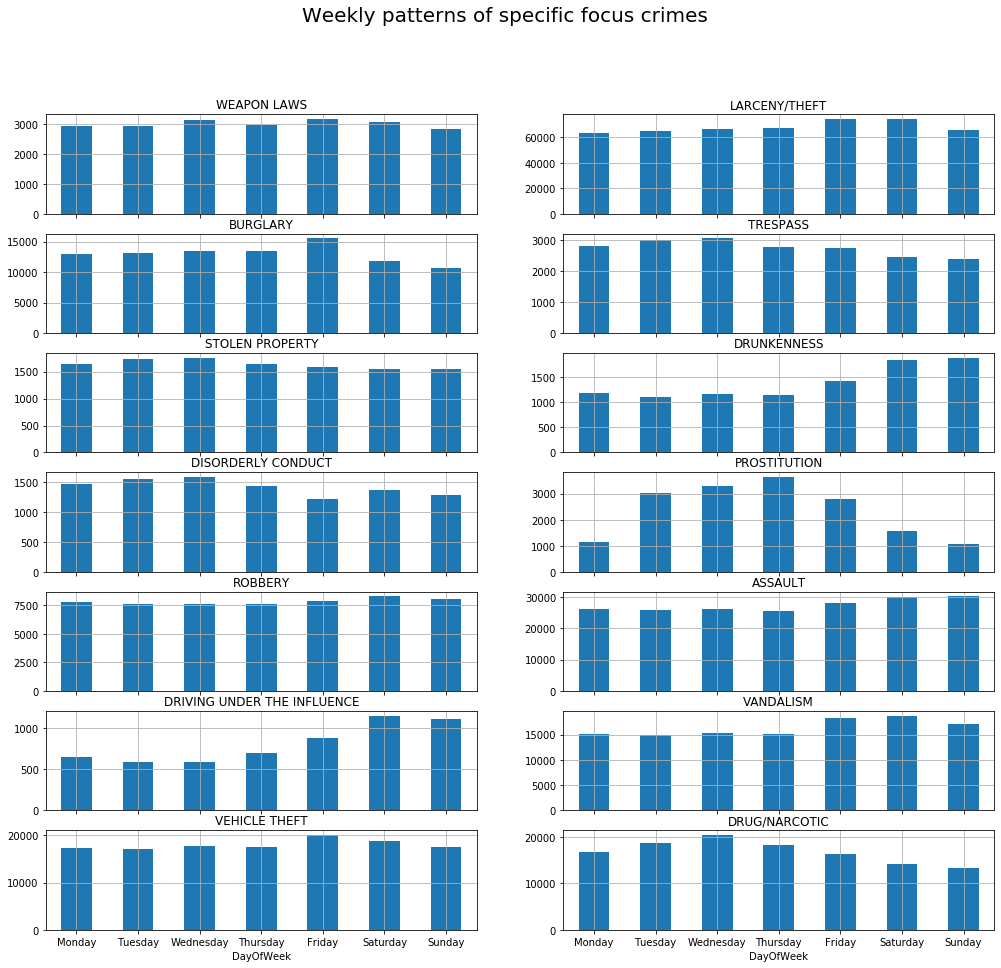

In [12]:
DaysInOrder = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plots for weekly patterns for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(17, 15), sharex=True)
plt.suptitle('Weekly patterns of specific focus crimes', fontsize=20)

for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(PDreports.groupby(['Category', 'DayOfWeek']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0).loc[DaysInOrder, :]
    x1 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)
    x2 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)

In [13]:
# # df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')

# (PDreports.groupby('DayOfWeek').count()
#  .filter(like='WEAPON LAWS', axis = 0)['PdId']
#  .plot(kind='bar', figsize=(9,5), rot=0, grid=True))

**The months.** We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [14]:
PDreports['Month'] = pd.to_datetime(PDreports['Date']).dt.month #to_period('M')

In [15]:
# PDreports['Month']

In [16]:
# (PDreports.groupby(['Category','Month']).count()
#  .filter(like='WEAPON LAWS', axis = 0)
#     .unstack(level=0)['PdId']
#     .plot(kind='bar', figsize=(9, 5)))

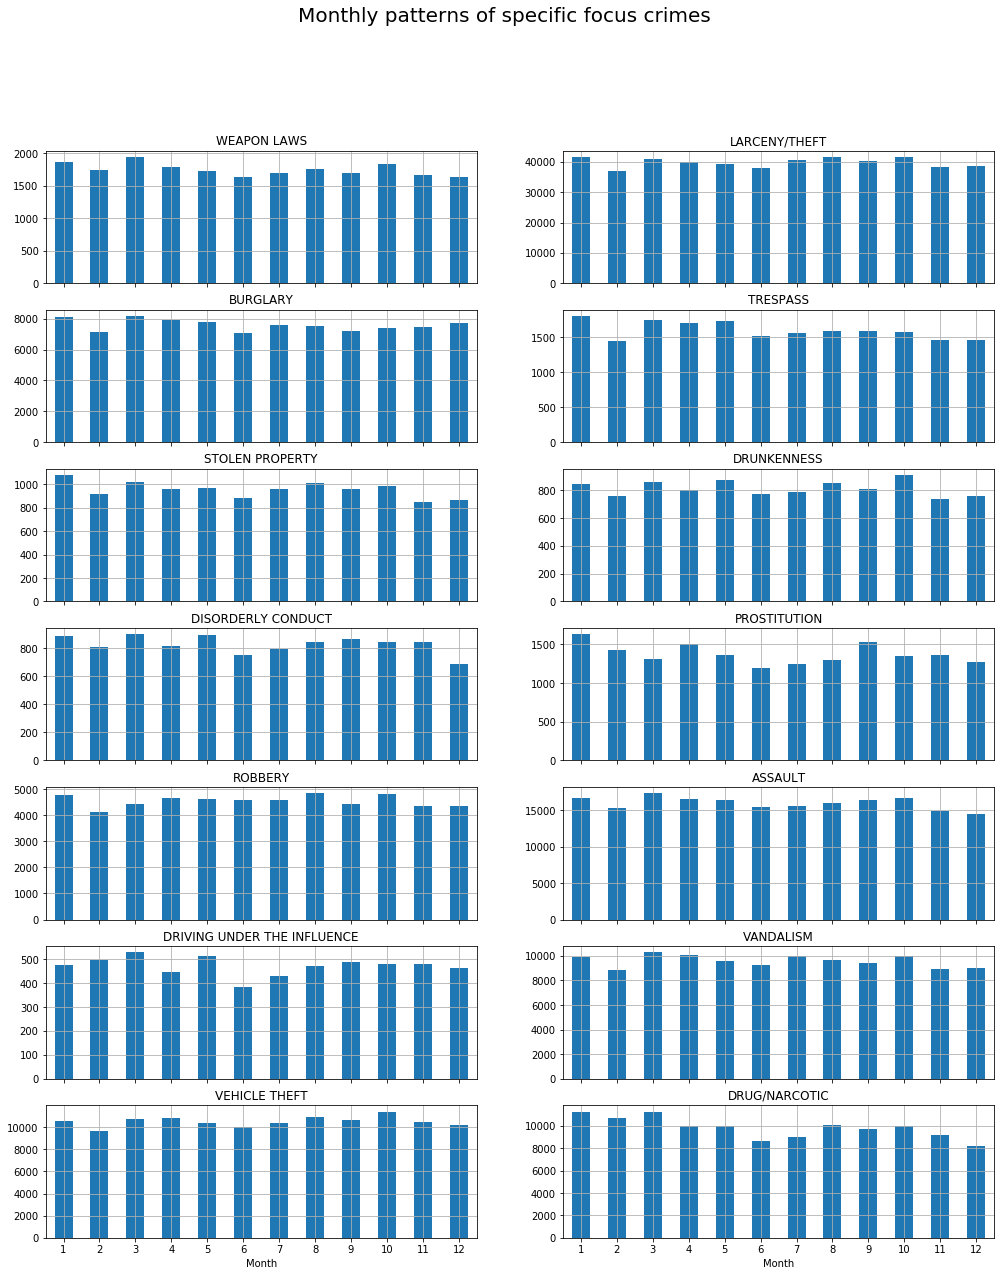

In [17]:
# Plots for monthly patterns for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(17, 20), sharex=True)
plt.suptitle('Monthly patterns of specific focus crimes', fontsize=20)

for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(PDreports.groupby(['Category', 'Month']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0) #.loc[DaysInOrder, :]
    x1 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)
    x2 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)

 **The 24 hour cycle**. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [18]:
PDreports['Hour'] = pd.to_datetime(PDreports['Time']).dt.hour

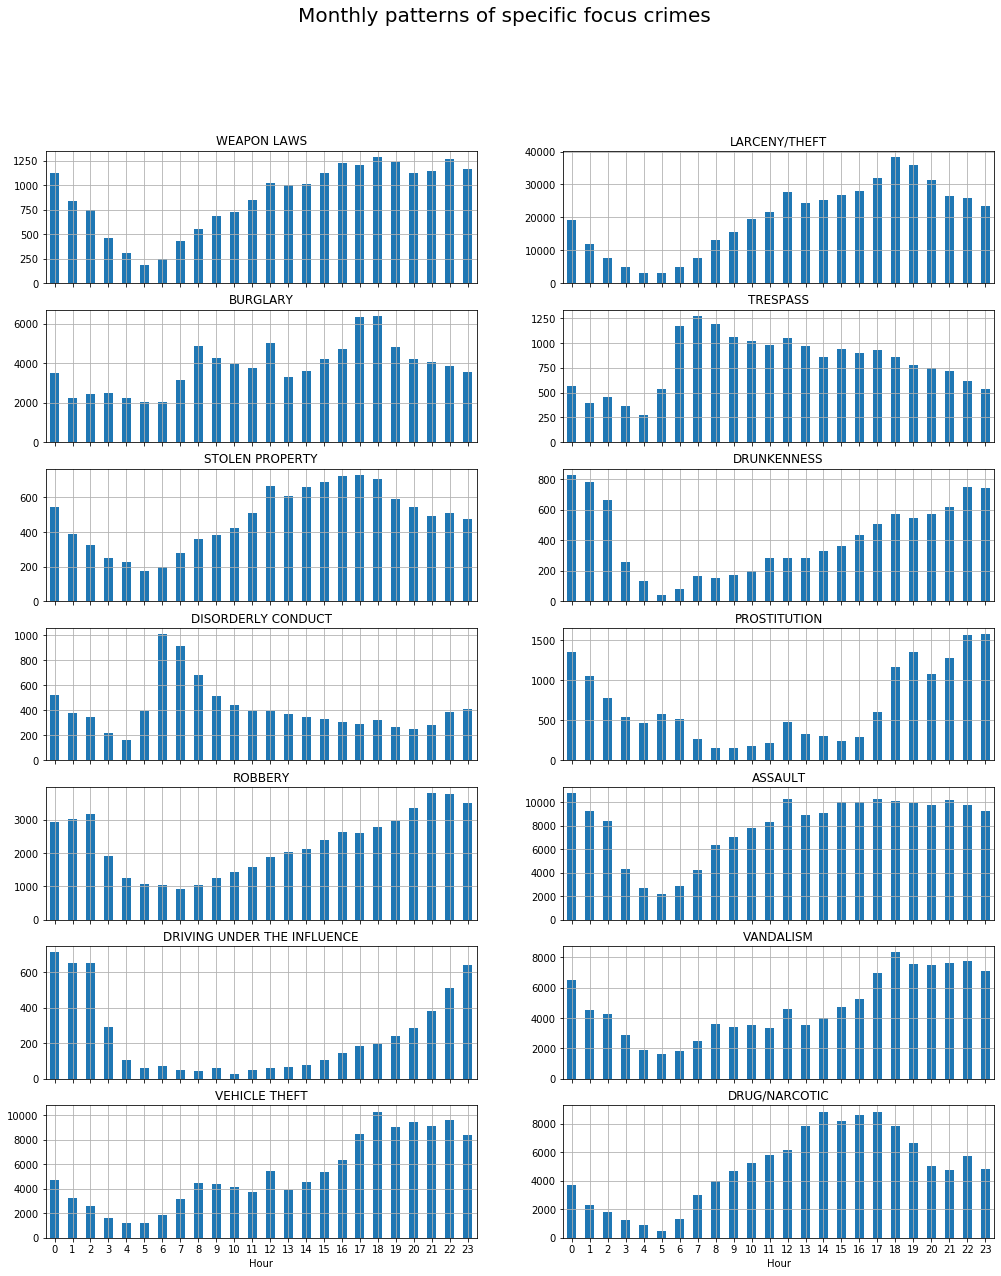

In [19]:
# Plots for monthly patterns for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(17, 20), sharex=True)
plt.suptitle('Monthly patterns of specific focus crimes', fontsize=20)

for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(PDreports.groupby(['Category', 'Hour']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0)
    x1 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)
    x2 = focusCrimeDf.plot(kind='bar', ax=axarr[i//2,i%2], title=crime, rot=0, grid=True, legend=False)

**Hours of the week**. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [36]:
PDreports['DayOfWeek'] = pd.Categorical(PDreports['DayOfWeek'], categories=DaysInOrder, ordered=True)

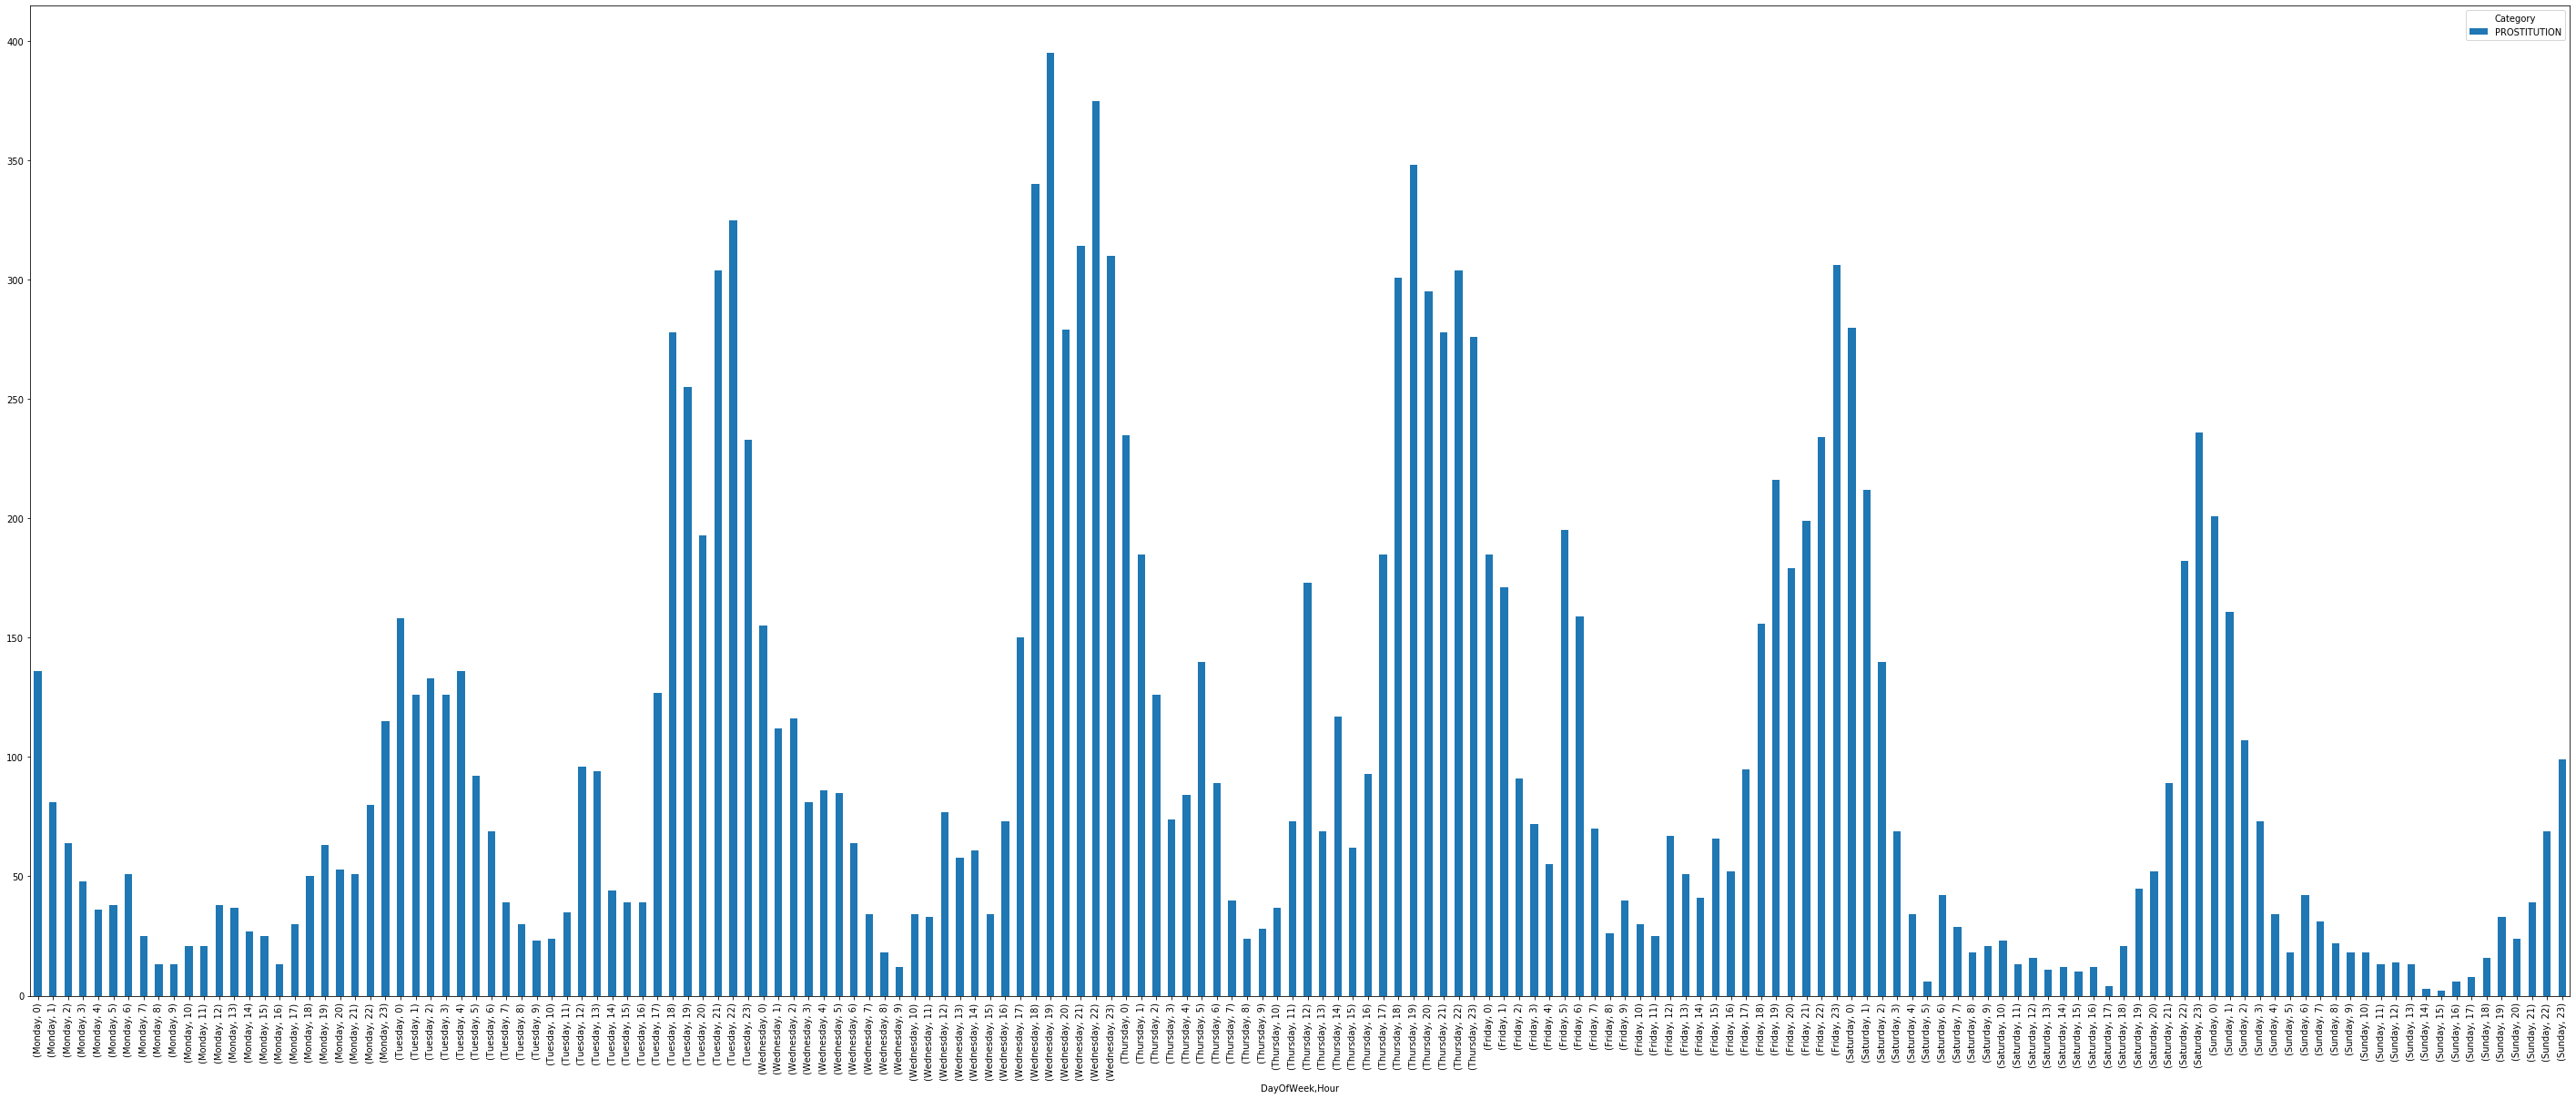

In [52]:
(PDreports.groupby(['Category','DayOfWeek' ,'Hour']).count()
 .filter(like = 'PROSTITUTION', axis=0)['PdId']
 .unstack(level=0)
 .plot(kind='bar', figsize=(50, 20)))

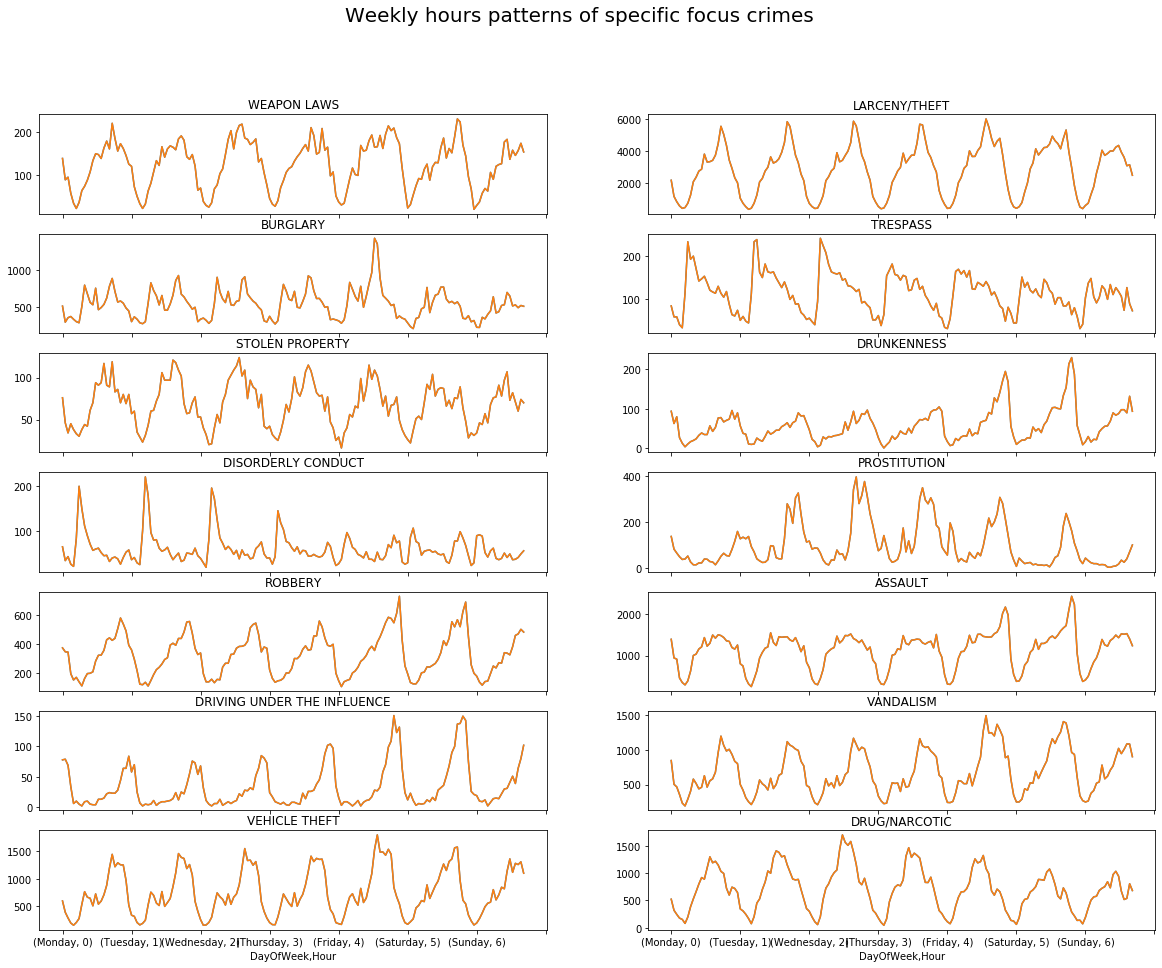

In [53]:
# Plots for weekly hour patterns for all Focus Crimes
fig, axarr = plt.subplots(7, 2, figsize=(20, 15), sharex=True)
plt.suptitle('Weekly hours patterns of specific focus crimes', fontsize=20)

for i,crime in enumerate(focuscrimes):
    focusCrimeDf = pd.DataFrame(PDreports.groupby(['Category', 'DayOfWeek', 'Hour']).count()
                             .filter(like = crime, axis=0)['PdId']).unstack(level=0)
    x1 = focusCrimeDf.plot(kind='line', ax=axarr[i//2,i%2], title=crime, rot=0, grid=False, legend=False)
    x2 = focusCrimeDf.plot(kind='line', ax=axarr[i//2,i%2], title=crime, rot=0, grid=False, legend=False)

**The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.** The types of crime and how they take place across San Francisco's police districts.

So now we'll be combining information about PdDistrict and Category to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.

In [59]:
PDreports.groupby('PdDistrict')['PdId'].count().sort_values(ascending=False)

PdDistrict
SOUTHERN      394234
MISSION       293072
NORTHERN      269229
CENTRAL       223962
BAYVIEW       210729
TENDERLOIN    189034
INGLESIDE     186645
TARAVAL       158710
PARK          121070
RICHMOND      114267
Name: PdId, dtype: int64

In [74]:
PDreports[PDreports['Category'] == focuscrimes]

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Month,Hour


In [68]:
PDreports.groupby('PdDistrict').filter(PDreports['Category'] == focuscrimes, axis=0).count()

TypeError: 'Series' object is not callable

In [73]:
(PDreports.groupby(['PdDistrict', 'Category']).count()
 .filter(like = focuscrimes, axis=0)
)#.sort_values(ascending=False)

TypeError: 'in <string>' requires string as left operand, not set